In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_fwf('./wili dataset/x_train.txt', header=None)
X_train = df[[0]]
df = pd.read_fwf('./wili dataset/x_test.txt', header=None)
X_test = df[[0]]

In [3]:
target = pd.read_fwf('./wili dataset/y_train.txt',header = None)
y_train = target[0]
target = pd.read_fwf('./wili dataset/y_test.txt',header = None)
y_test = target[0]

In [4]:
X_train.head()

,0
0,Klement Gottwaldi surnukeha palsameeriti ning ...
1,"Sebes, Joseph; Pereira Thomas (1961) (pÃ¥ eng)..."
2,à¤­à¤¾à¤°à¤¤à¥€à¤¯ à¤¸à¥�à¤µà¤¾à¤¤à¤¨à¥�à¤¤à¥�...
3,AprÃ¨s lo cort periÃ²de d'establiment a BasilÃ...
4,à¸–à¸™à¸™à¹€à¸ˆà¸£à¸´à¸�à¸�à¸£à¸¸à¸‡ (à¸­à¸±à¸...


In [5]:
X_test.head()

,0
0,Ne l fin de l seclo XIX l Japon era inda Ã§con...
1,Schiedam is gelegen tussen Rotterdam en Vlaard...
2,"Ð“IÑƒÑ€ÑƒÑ�Ð°Ð· Ð±Ð°Ñ‚Ð°Ð»ÑŒÐ¾Ð½Ð°Ð», Ð³ÑŒÐ¾Ñ€..."
3,à²°à²¾à²œà³�à²¯à²¶à²¾à²¸à³�à²¤à³�à²°à²¦ à²ªà²¿...
4,Halukum adalah kelenjar tiroid nang menonjol d...


In [6]:
y_train[y_train == 'be-tara'] = 'be-tarask'
y_train[y_train == 'roa-tar'] = 'roa-tara'
y_train.head()

0    est
1    swe
2    mai
3    oci
4    tha
Name: 0, dtype: object

In [7]:
labels = pd.read_csv('./wili dataset/labels.csv', delimiter=';')

In [8]:
labels.head()

,Label,English,Wiki Code,ISO 369-3,German,Language family,Writing system,Remarks,Synonyms
0,ace,Achinese,ace,ace,Achinesisch,Austronesian,NaN,NaN,NaN
1,afr,Afrikaans,af,afr,Afrikaans,Indo-European,NaN,NaN,NaN
2,als,Alemannic German,als,gsw,Alemannisch,Indo-European,NaN,(ursprünglich nur Elsässisch),NaN
3,amh,Amharic,am,amh,Amharisch,Afro-Asiatic,NaN,NaN,NaN
4,ang,Old English,ang,ang,Altenglisch,Indo-European,NaN,(ca. 450-1100),Angelsächsisch


### Tokenize the Labels

In [9]:
label2int = {}
counter = 1
for label in labels['Label']:
    if label not in label2int:
        label2int[label] = counter
    counter += 1

### Tokenize the  target variables

In [10]:
y_train_int = []
for label in y_train:
    y_train_int.append(label2int[label])

In [11]:
y_test_int = []
for label in y_test:
    y_test_int.append(label2int[label])

### Data Preprocessing

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
vectorizer = TfidfVectorizer(analyzer='char',min_df=25,lowercase=True, norm='l2')

In [38]:
vectorizer.fit(X_train[0])

TfidfVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=25,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [39]:
X_train2int = vectorizer.transform(X_train[0]).toarray()

In [40]:
X_train2int.shape

(117500, 155)

In [41]:
X_test2int = vectorizer.transform(X_test[0]).toarray()

In [42]:
X_test2int.shape

(117500, 155)

### PCA

In [43]:
from sklearn.decomposition import PCA

In [44]:
pca = PCA(n_components=None)

In [45]:
pca.fit(X_train2int)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [47]:
pca_X_train = pca.transform(X_train2int)

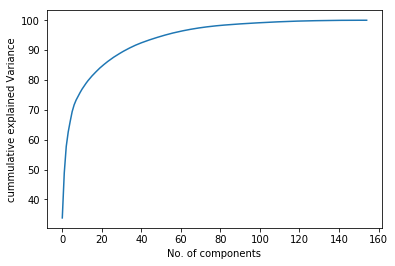

In [51]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel("No. of components")
plt.ylabel("cummulative explained Variance");

In [52]:
pca_X_test = pca.transform(X_test2int)

### Naive Bayes

In [53]:
from sklearn.linear_model import SGDClassifier

In [54]:
clf = SGDClassifier()

In [56]:
clf.fit(X_train2int, y_train_int)

C:\Users\Jatin\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [57]:
y_pred = clf.predict(X_train2int)

In [58]:
from sklearn.metrics import classification_report

In [59]:
print(classification_report(y_train_int, y_pred))

             precision    recall  f1-score   support

          1       0.91      0.88      0.89       500
          2       0.98      0.54      0.69       500
          3       0.93      0.39      0.55       500
          4       0.99      0.99      0.99       500
          5       0.90      0.90      0.90       500
          6       0.73      0.91      0.81       500
          7       0.95      0.36      0.53       500
          8       0.87      0.62      0.73       500
          9       0.73      0.93      0.82       500
         10       0.63      0.72      0.67       500
         11       0.86      0.68      0.76       500
         12       0.91      0.90      0.91       500
         13       0.58      0.97      0.73       500
         14       0.94      0.99      0.96       500
         15       0.73      0.96      0.83       500
         16       0.53      0.54      0.54       500
         17       0.74      0.75      0.74       500
         18       0.00      0.00      0.00   

C:\Users\Jatin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
